<a href="https://colab.research.google.com/github/JacopoMangiavacchi/TF-VS-PyTorch/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import PyTorch and TensorFlow

In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
print(f"tensorflow version: {tf.__version__}")

tensorflow version: 2.3.0


In [3]:
import torch
print(f"pytorch version: {torch.__version__}")

pytorch version: 1.6.0+cu101


# Generating the datasets

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def generate_data(m=0.1, b=0.3, n=200):
    x = np.random.uniform(-10, 10, n)
    noise = np.random.normal(0, 0.15, n)
    y = (m * x + b ) + noise
    return x.astype(np.float32), y.astype(np.float32)

    # x = tf.random.uniform(shape=(n,),minval=-10,maxval=10) 
    # noise = tf.random.normal(shape=(len(x),), stddev=0.15)
    # y = (m * x + b ) + noise
    # return x.numpy(), y.numpy()

## Data Visualization

<class 'numpy.ndarray'> (200,) float32
<class 'numpy.ndarray'> (200,) float32


Text(0, 0.5, 'y')

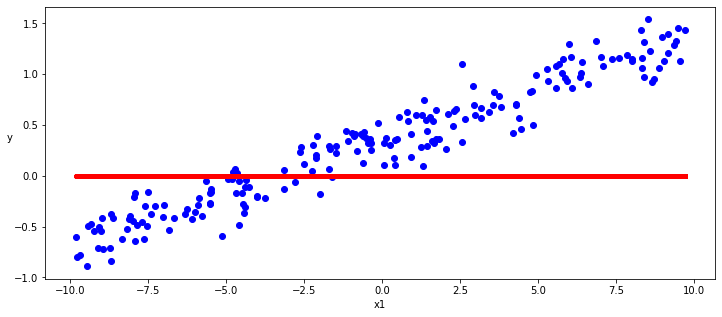

In [6]:
m = tf.Variable(0.)
b = tf.Variable(0.)
x, y = generate_data()

print(type(x), x.shape, x.dtype)
print(type(y), y.shape, y.dtype)

plt.figure(figsize = (12,5))
ax = plt.subplot(111)
ax.scatter(x,y, c = "b", label="samples")
ax.plot(x,m*x+b,"-r",linewidth = 5.0,label = "model")
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)

# TensorFlow Model

In [7]:
class LinearRegressionKeras(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.params = {
            "w" : tf.Variable(tf.random.uniform(shape=[1], minval=-0.1, maxval=0.1)),
            "b" : tf.Variable(tf.random.uniform(shape=[1], minval=-0.1, maxval=0.1))
        }        

    def __call__(self,x): 
        y_pred = self.params["w"] * x + self.params["b"]
        return y_pred

# PyTorch Model

In [8]:
class LinearRegressionPyTorch(torch.nn.Module): 
    def __init__(self): 
        super(LinearRegressionPyTorch, self).__init__() 
        self.w = torch.nn.Parameter(torch.Tensor(1, 1))
        self.b = torch.nn.Parameter(torch.Tensor(1))
        self.w.data.uniform_(-0.1, 0.1)
        self.b.data.uniform_(-0.1, 0.1)
  
    def forward(self, x):  
        return x @ self.w + self.b
    
    
# class LinearRegressionPyTorch(torch.nn.Module):
#     def __init__(self):
#         super(LinearRegressionPyTorch, self).__init__()
#         self.linear = torch.nn.Linear(1, 1)  

#     def forward(self, x):
#         out = self.linear(x)
#         return out

# TensorFlow Training

In [9]:
epochs = 500
learning_rate = 0.001

In [10]:
def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

tf_model = LinearRegressionKeras()

for epoch in tf.range(1,epochs):
    with tf.GradientTape() as tape:
        predictions = tf_model(x)
        loss = squared_error(predictions, y)
        
    dloss_dw,dloss_db = tape.gradient(loss, [tf_model.params["w"], tf_model.params["b"]])

    tf_model.params["w"].assign(tf_model.params["w"] - learning_rate*dloss_dw)
    tf_model.params["b"].assign(tf_model.params["b"] - learning_rate*dloss_db)
    if epoch % 20 == 0:
        print(f"Step {epoch}, Loss {loss.numpy()}") # we print the loss only each 20 epochs

Step 20, Loss 0.09151533246040344
Step 40, Loss 0.08019290864467621
Step 60, Loss 0.0755053460597992
Step 80, Loss 0.07159774005413055
Step 100, Loss 0.06802050024271011
Step 120, Loss 0.06471987068653107
Step 140, Loss 0.06167255714535713
Step 160, Loss 0.05885900557041168
Step 180, Loss 0.05626126378774643
Step 200, Loss 0.05386274680495262
Step 220, Loss 0.051648225635290146
Step 240, Loss 0.049603547900915146
Step 260, Loss 0.04771570861339569
Step 280, Loss 0.045972660183906555
Step 300, Loss 0.044363297522068024
Step 320, Loss 0.042877379804849625
Step 340, Loss 0.04150543734431267
Step 360, Loss 0.040238719433546066
Step 380, Loss 0.03906916454434395
Step 400, Loss 0.03798931464552879
Step 420, Loss 0.03699229657649994
Step 440, Loss 0.03607174754142761
Step 460, Loss 0.03522181138396263
Step 480, Loss 0.03443704918026924


# PyTorch Training

In [11]:
inputs = torch.autograd.Variable(torch.from_numpy(x.reshape(-1, 1)))
labels = torch.autograd.Variable(torch.from_numpy(y.reshape(-1, 1)))


In [12]:
def squared_error(y_pred, y_true):
    diff = y_pred - y_true
    return torch.sum(diff * diff) / diff.numel()


torch_model = LinearRegressionPyTorch()
[w, b] = torch_model.parameters()

# criterion = torch.nn.MSELoss(reduction='mean')
# optimizer = torch.optim.SGD(torch_model.parameters(), lr=learning_rate)

for epoch in range(epochs):
    epoch_loss = 0
    y_pred = torch_model(inputs)

    loss = squared_error(y_pred, labels)

    epoch_loss = loss.data

    # optimizer.zero_grad()
    loss.backward()
    # optimizer.step()

    with torch.no_grad():
        w -= w.grad * learning_rate
        b -= b.grad * learning_rate
        w.grad.zero_()
        b.grad.zero_()

    if epoch % 20 == 0:
      print("Epoch {} : Loss {}".format(epoch, epoch_loss))


Epoch 0 : Loss 0.9220589399337769
Epoch 20 : Loss 0.19499069452285767
Epoch 40 : Loss 0.13395877182483673
Epoch 60 : Loss 0.12210173904895782
Epoch 80 : Loss 0.11439807713031769
Epoch 100 : Loss 0.10752183943986893
Epoch 120 : Loss 0.1011902317404747
Epoch 140 : Loss 0.09534553438425064
Epoch 160 : Loss 0.08994922041893005
Epoch 180 : Loss 0.08496680855751038
Epoch 200 : Loss 0.08036655187606812
Epoch 220 : Loss 0.07611915469169617
Epoch 240 : Loss 0.07219754159450531
Epoch 260 : Loss 0.06857670098543167
Epoch 280 : Loss 0.06523359566926956
Epoch 300 : Loss 0.06214691326022148
Epoch 320 : Loss 0.05929698050022125
Epoch 340 : Loss 0.05666564032435417
Epoch 360 : Loss 0.05423610657453537
Epoch 380 : Loss 0.051992930471897125
Epoch 400 : Loss 0.04992181807756424
Epoch 420 : Loss 0.04800955951213837
Epoch 440 : Loss 0.046243976801633835
Epoch 460 : Loss 0.04461381584405899
Epoch 480 : Loss 0.043108679354190826


# Data Visualization

In [13]:
tf_model.params["w"].numpy(), tf_model.params["b"].numpy(), w.tolist()[0][0], b.tolist()[0]

(array([0.10183269], dtype=float32),
 array([0.24819858], dtype=float32),
 0.10145001113414764,
 0.21219104528427124)

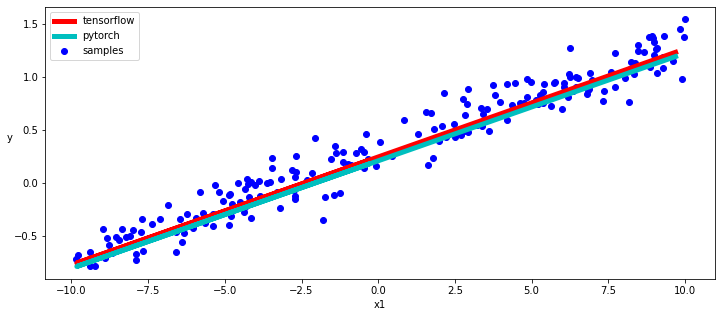

In [14]:
with torch.no_grad():
  x_train, y_train = generate_data()
  plt.figure(figsize = (12,5))
  ax = plt.subplot(111)
  ax.scatter(x_train,y_train, c = "b", label="samples")
  ax.plot(x, tf_model.params["w"] * x + tf_model.params["b"], "r", linewidth = 5.0, label = "tensorflow")
  ax.plot(x, w * inputs + b, "c", linewidth = 5.0, label = "pytorch")
  ax.legend()
  plt.xlabel("x1")
  plt.ylabel("y",rotation = 0)